<table>
<col width="650">
<col width="50">
<tr>
<td><img src="https://media4.s-nbcnews.com/j/newscms/2019_06/1407515/heart-health-today-main-190205_2f9b9d7d2c9532705688b9e54fc88767.fit-2000w.jpg
" align="center" style="width:700px;height:360px;"/></td>
<td>
</td>
</tr>
</table>


In [1]:
# Importing libraries
import numpy as np  # Numerical and linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # Data visualization

import scipy.stats as stats
from scipy.stats import sem, t
from scipy import mean

from IPython.display import Image

In [2]:
# Importing dataset in csv to pandas data frame.
data = pd.read_csv("C:/Users/User/Desktop/Heart Rate/heart.csv")

print('Data Shape Show (On the left side represents the rows, and on the right side represents the columns):\n')
data.shape


Data Shape Show (On the left side represents the rows, and on the right side represents the columns):



(303, 14)

In [3]:
#Now, our data is loaded. We're writing the following code to see some information from the data. 
#The purpose here is to see the top ten of the loaded data.

print('The first 10 rows of Data:\n')
data.head(10)

The first 10 rows of Data:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#The purpose here is to see the bottom ten of the loaded data.

print('The Last 10 Rows of Data:\n')
data.tail(10)

The Last 10 Rows of Data:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Here, we would like to see the full mathematical description from our data that we are about to analyze. 

print('Description of the Data:\n')
data.describe()

Description of the Data:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Checking for the null values

print('Sum of Null Values of the Data \n')
data.isnull().sum()

Sum of Null Values of the Data 



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Extracting brief descriprion of how the columns appear in the dataset

print('Column Names of the Data:\n')
data.columns

Column Names of the Data:



Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal', u'target'],
      dtype='object')

## Dataset Columns Feature Explanation 

* **Age:** The person's *Age* in years


* **Sex:** The person's *Sex* (1 = **Male**, 0 = **Female**)


* **CP:** The *Chest Pain* experienced (1: **Typical Angina**, 2: **Atypical Angina**, 3: **Non-Anginal Pain**, 4: **Asymptomatic**)


* **TRESTBPS:** The person's *Resting Blood Pressure* (mmHg on admission to the hospital)


* **CHOL:** The person's *Cholesterol* measurement (in mg/dL)


* **FBS:** The person's *Fasting Blood Sugar* (> 120 mg/dL, 1 = **True**; 0 = **False**)


* **REST-ECG:** *Resting Electrocardiographic* measurement (0 = **Normal**, 1 = **Having ST-T wave Abnormality**, 2 = **Showing probable or definite left ventricular hypertrophy**)


* **THALACH:** The person's *Maximum Heart Rate* achieved


* **EXANG:** *Exercise Induced Angina* (1 = **Yes**; 0 = **No**)


* **OLDPEAK:** *ST Depression Induced* by exercise relative to rest ('ST' relates to positions on the ECG plot)


* **SLOPE:** The *Slope* of the peak exercise ST segment (1: **psloping**, 2: **Flat**, 3: **Downsloping**)


* **CA:** The number of *Major Vessels* (0-3)


* **THAL:** A blood disorder called *Thalassemia* (3 = **Normal**; 6 = **Fixed defect**; 7 = **Reversable Defect**)


* **TARGET:** *Heart Disease* (0 = **No**, 1 = **Yes**)

In [8]:
#Reshaping names for the existing columns

data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Chest_Pain_Type','trestbps':
                          'Resting_Blood_Pressure','chol':'Serum_Cholesterol','fbs':'Fasting_Blood_Sugar',
                          'restecg':'Rest_ECG','thalach':'Max_Heart_Rate','exang':'Exercise_Induced_Angina',
                          'oldpeak':'St_Depression','slope':'St_Slope','ca':'Number_Major_Vessels',
                          'thal':'Thalassemia','target':'Target'})
data.columns

Index([u'Age', u'Sex', u'Chest_Pain_Type', u'Resting_Blood_Pressure',
       u'Serum_Cholesterol', u'Fasting_Blood_Sugar', u'Rest_ECG',
       u'Max_Heart_Rate', u'Exercise_Induced_Angina', u'St_Depression',
       u'St_Slope', u'Number_Major_Vessels', u'Thalassemia', u'Target'],
      dtype='object')

In [9]:
# For easier analysis and clean results, listing the actual meanings of each parameter 

data.Target = data.Target.replace({0:'No Heart Disease', 1:'Heart Disease'})
data.Sex = data.Sex.replace({0:'Female', 1:'Male'})
data.Chest_Pain_Type = data.Chest_Pain_Type.replace({1:'Agina Pectoris', 2:'Atypical Agina', 3:'Non-Anginal Pain',
                                                     0:'Absent'})
data.St_Slope = data.St_Slope.replace({1:'Upsloping', 2:'Horizontal', 3:'Downsloping', 0:'Absent'})
data.Fasting_Blood_Sugar = data.Fasting_Blood_Sugar.replace({0:'Greater than 120mg/dL', 1:'Lower than 120mg/dL'})
data.Exercises_Induced_Angina = data.Exercise_Induced_Angina.replace({0:'No', 1:'Yes'})
data.Thalassemia = data.Thalassemia.replace({1:'Normal', 2:'Fixed defect', 3:'Reversable defect', 0:'Absent'})

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


Number of people with heart disease (165), no heart disease (138). There are 207 Male and 96 Female



[165, 138]

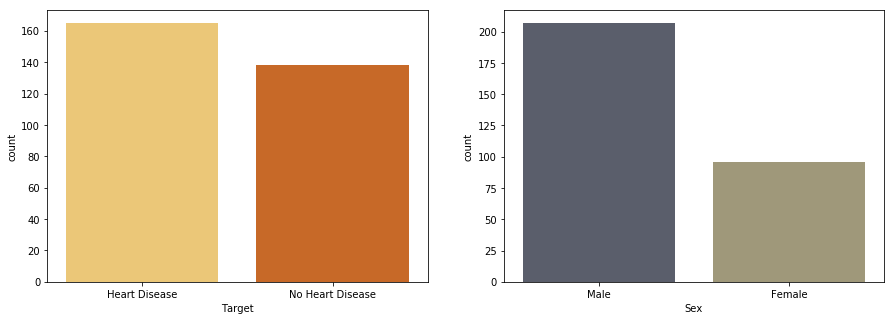

In [10]:
#Getting to know our data with number of males and females and the Target measurement

fig, axs = plt.subplots(ncols=2)
sns.countplot(data=data, x="Target", palette="YlOrBr", ax=axs[0])
sns.countplot(data=data, x="Sex", palette="cividis", ax=axs[1])
plt.gcf().set_size_inches(15, 5)

print('Number of people with heart disease (165), no heart disease (138). There are 207 Male and 96 Female\n')
types = np.unique(data.Target)
count_ = [0,0]
for j in data.Target:
    for idx,val in enumerate(types):
        if val == j: count_[idx] += 1 
count_

Number of male and female with heart disease and without



[96, 207]

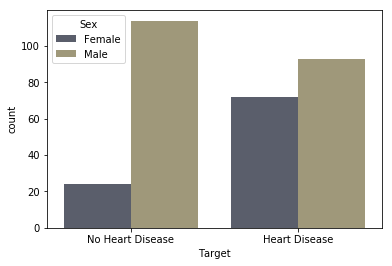

In [11]:
#Ratio between men with heart disease and men without heart disease and same for women

data = data.sort_values('Target', ascending=0)
sns.countplot(data=data, x="Target", hue="Sex", palette="cividis")

print('Number of male and female with heart disease and without\n')
types = np.unique(data.Sex)
count_ = [0,0]
for j in data.Sex:
    for idx,val in enumerate(types):
        if val == j: count_[idx] += 1 
count_

Age distribution for Male and Female and likelihood to get heart disease



Text(0.5,0,'Age Distribution (Yellow = Male, Pink = Female)')

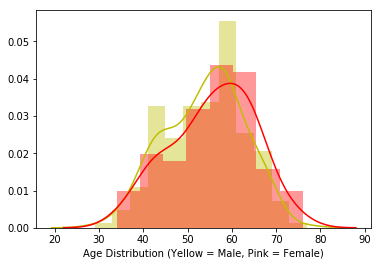

In [12]:
#Looking on age distribution for men and women to see the age where the incident of getting heart disease 
#is most likely happening 

print('Age distribution for Male and Female and likelihood to get heart disease\n')

sns.distplot(data[data.Sex=="Male"].Age, color="y")
sns.distplot(data[data.Sex=="Female"].Age, color="r")
plt.xlabel("Age Distribution (Yellow = Male, Pink = Female)")

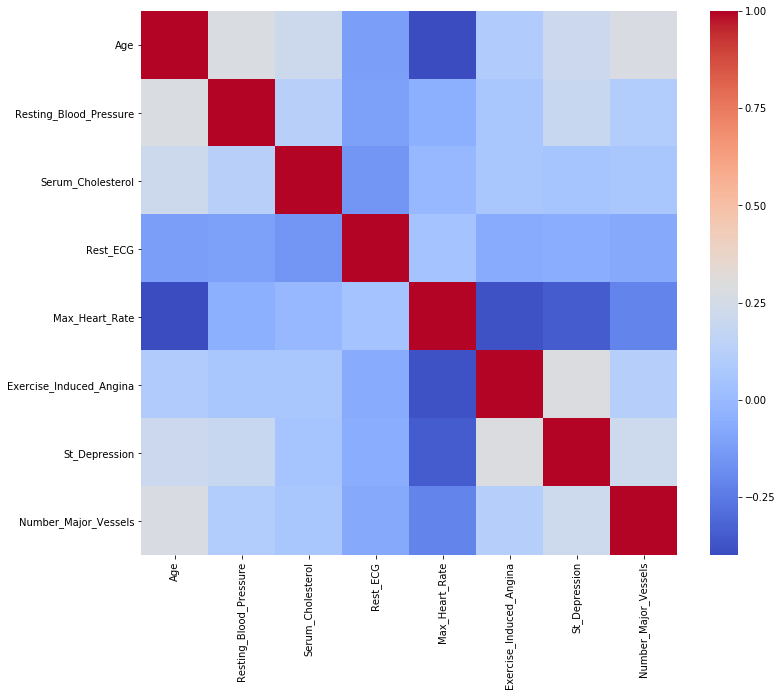

In [13]:
# Correlation matrix from our dataset. The correlation is measured between 1 to -1 where the value is close to 
#1 or -1 then we can assume there is strong positive correlation or strong negative correlation respectively. 
#While the correlation is close to 0, we can conclude there is a weak correlation between the measurements.

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm')

# Heart Disease Terminologies

## (I). Angina

* Type of a chest pain caused by reduced blood flow to the heart. 


* Angina Pectoris or Typical Angina, occurs when the heart must work harder (lasts around 5 mins or less).


* Atypical Angina, is discomfort centered in the chest that is **not** cardiac pain (Myocardial infarction).

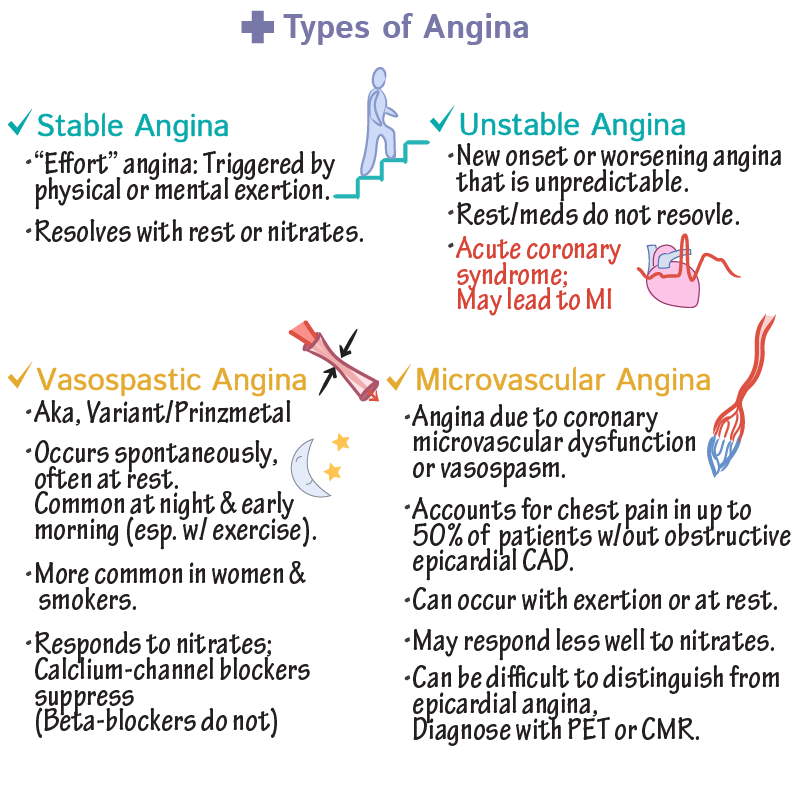

In [14]:
Image (filename="C:/Users/User/Desktop/Heart Rate/Angina.png", width=700, height=500)

## (II). Serum cholesterol

**Serum cholesterol includes:**

* LDL level


* HDL level


**NOTE** Having low LDL level and high HDL level is the best way maintaining healthy lifestyle. Healthy serum cholesterol needs to be less than 200 mg/dL. Calculation: HDL + LDL + 0.2 * triglycerides  = total which has to be less than 200 mg/dL.

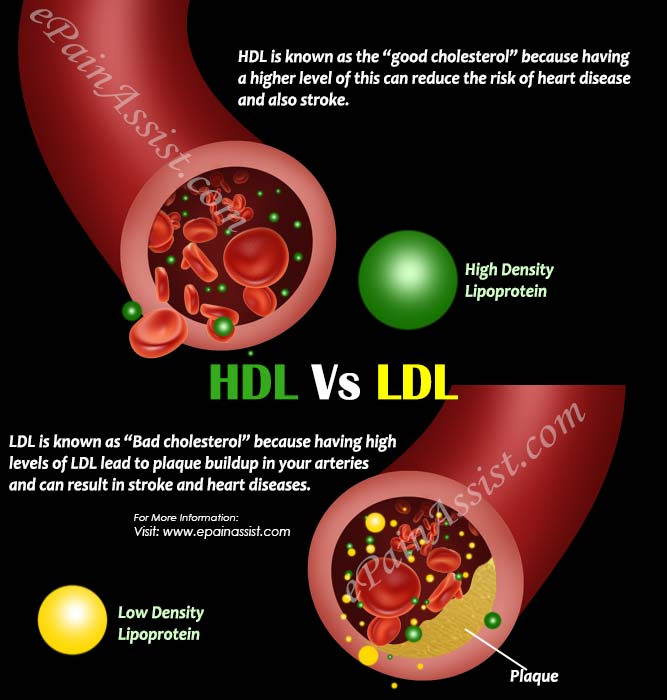

In [15]:
Image (filename="C:/Users/User/Desktop/Heart Rate/HDL and LDL.jpg", width=700, height=500)

## (III). ST Segment and ST Depression

The ST Segment represents an electrically neutral area of the complex between QRS Complex (main spike) and T wave (second round peak)


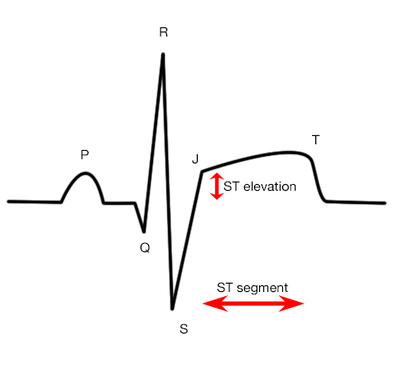

In [16]:
Image (filename="C:/Users/User/Desktop/Heart Rate/ST Segment.jpg", width=500, height=500)

## (IV). Thalassemia

Blood disorder that causes the body to make inadequate amount of hemoglobin, the protein that carries oxygen, in which results in large numbers of red blood cells being destroyed.

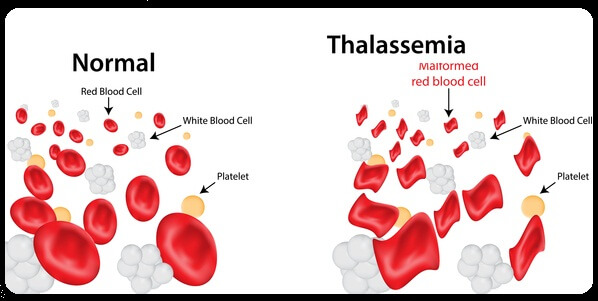

In [17]:
Image (filename="C:/Users/User/Desktop/Heart Rate/Thalassemia.jpg", width=800, height=500)

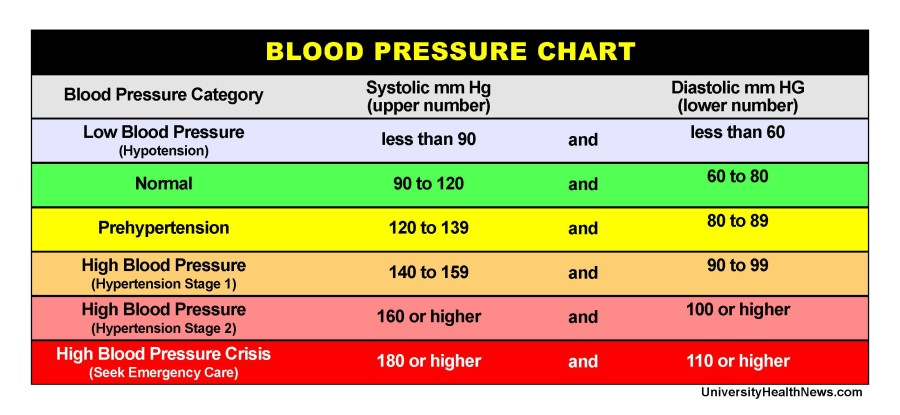

In [25]:
Image (filename="C:/Users/User/Desktop/Heart Rate/blood-pressure-chart.jpg", width=800, height=500)

# Part 1: Association Analysis

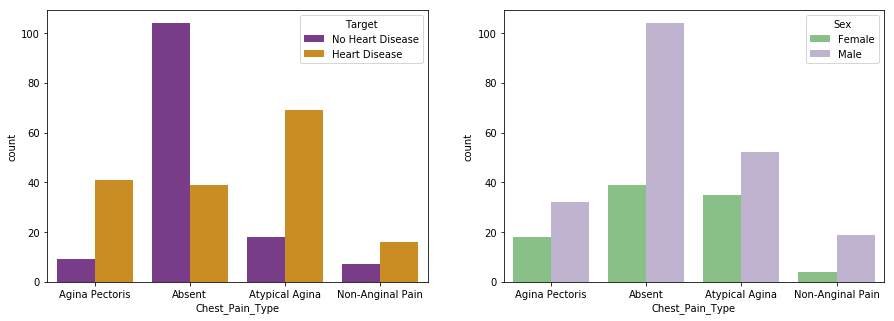

In [14]:
#Chest pain type and Heart Disease association to both genders (Agina Pectoris, Atypical Agina, 
#Non-Anginal Pain or Absent)

fig, axs = plt.subplots(ncols=2)
sns.countplot(x="Chest_Pain_Type", hue="Target", data=data, palette="CMRmap", ax=axs[0])
sns.countplot(x="Chest_Pain_Type", hue="Sex", data=data, palette="Accent", ax=axs[1])
plt.gcf().set_size_inches(15, 5)

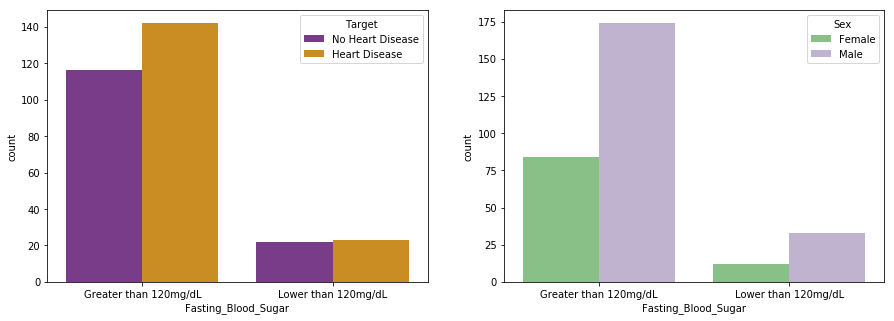

In [15]:
# Fasting blood sugar count between Male and Female 

fig, axs = plt.subplots(ncols=2)
sns.countplot(x="Fasting_Blood_Sugar", hue="Target", data=data, palette="CMRmap", ax=axs[0])
sns.countplot(x="Fasting_Blood_Sugar", hue="Sex", data=data, palette="Accent", ax=axs[1])
plt.gcf().set_size_inches(15, 5)


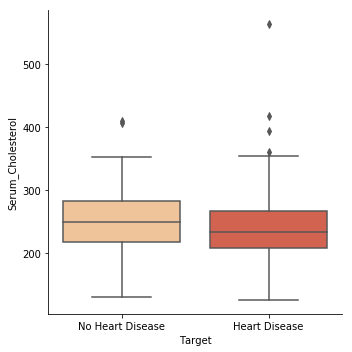

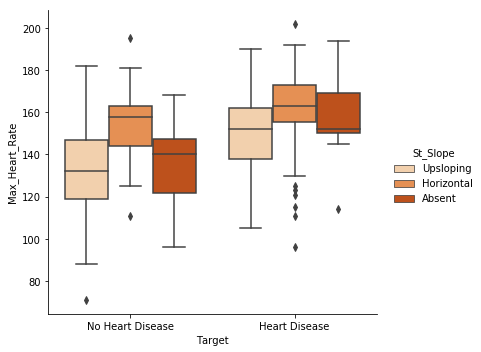

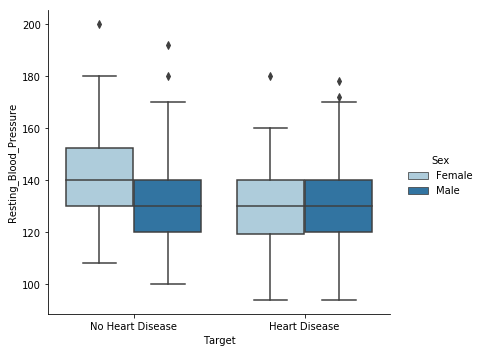

In [16]:
#Creating Bot-Plots to associate Serum Cholesterol, Max Heart Rate and Resting Blood Pressure to Heart Disease

sns.catplot(x="Target", y="Serum_Cholesterol", kind="box", data=data, palette="OrRd")
plt.gcf().set_size_inches(5, 5)
sns.catplot(x="Target", y="Max_Heart_Rate", hue="St_Slope", kind="box", data=data, palette="Oranges")
plt.gcf().set_size_inches(7, 5)
sns.catplot(x="Target", y="Resting_Blood_Pressure", hue="Sex", kind="box", data=data, palette="Paired")
plt.gcf().set_size_inches(7, 5)

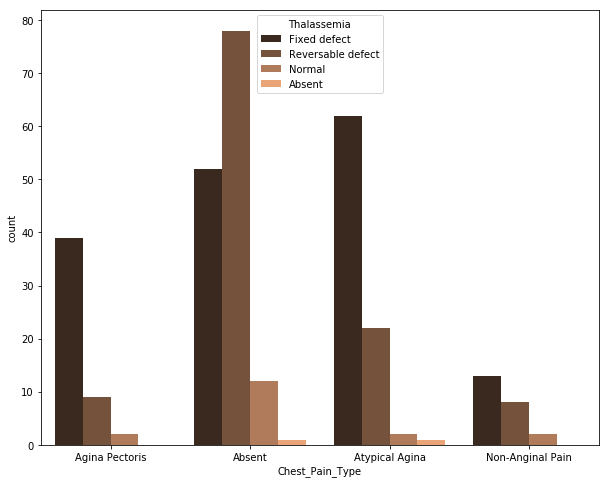

In [17]:
#Association between Chest Pain and Thalassemia

plt.figure(figsize=(10,8))
sns.countplot(x="Chest_Pain_Type", hue="Thalassemia", data=data, palette="copper")

# Part 2: Association Rule

**Example 1:**

## Chi-Squared Test Statistic 

The Chi Square statistic compares the tallies or counts of categorical responses between two (or more) independent groups. It is intended to test how likely it is that an observed distribution is due to chance.

**State:** (Chest Pain vs. Target)

**Ho:** No association between chest pain type and having Heart Disease (Null hypothesis)

**Ha:** There is an association between chest pain type and having Heart Disease (Alternative hypothesis)

**Plan:** 
Confidence = 95%, alpha level of significance = 0.05

##### **Conditions:**

  * Assume random sample
  
  
  * Sample size is less than 10% of the total population (people with heart disease)
  
  
  * All expected values are >= 0.05 to reject the null hypothesis

In [18]:
#Targeting Chest Pain and Heart Disease

chestpain_target = pd.crosstab(index=data.Target, columns=data.Chest_Pain_Type, margins=True)
observed = chestpain_target.iloc[0:2,0:4]
chestpain_target

Chest_Pain_Type,Absent,Agina Pectoris,Atypical Agina,Non-Anginal Pain,All
Target,,,,,
Heart Disease,39,41,69,16,165
No Heart Disease,104,9,18,7,138
All,143,50,87,23,303


In [19]:
chi2, p, dof, expected = stats.chi2_contingency(observed=observed)

In [20]:
print("="*10+" Results "+"="*10)
print("Chi-squared Statistic: "+str(chi2))
print("p-value: "+str(p))
print("Degrees of Freedom: "+str(dof))
print("Expected: "+str(expected))
print("="*29)

========== Results ==========
Chi-squared Statistic: 81.68642755194445
p-value: 1.3343043373050064e-17
Degrees of Freedom: 3
Expected: [[77.87128713 27.22772277 47.37623762 12.52475248]
 [65.12871287 22.77227723 39.62376238 10.47524752]]


## **Conclusion**
Besed on the results obtained we see that the **p-value** of **1.33e-17** is less than the assigned significance level alpha = 0.05, we have evidence to reject the null hypotheseis and conclude **there is an association between chest pain type and heart disease**

**Example 2:**

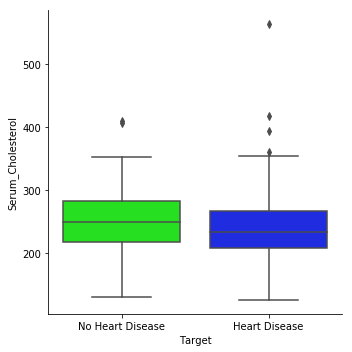

In [21]:
# Relationship between Serum Cholesterol and Heart Disease

sns.catplot(x="Target", y="Serum_Cholesterol", kind="box", data=data, palette="hsv")

As we can see there is not much difference between the serum cholesterol levels of patients with or without heart disease, this is why a test is necessary for us to conclude our findings.

**State:**

**Ho:** No association between Serum Cholesterol and having or not Heart Disease (Null hypothesis)

**Ha:** There is an association between Serum Cholesterol and having or not Heart Disease (Alternative hypothesis)

**Plan:**
Confidence = 95%, alpha level of significance = 0.05

**Conditions:**

* Assume random sample
  
  
  * Sample size is less than 10% of the total population (people with heart disease)
  
  
  * All expected values are >= 0.05 to reject the null hypothesis

In [22]:
#Targeting Serum Cholesterol and Heart Disease

no_disease_sc = data[data.Target=="No Heart Disease"].Serum_Cholesterol
disease_sc = data[data.Target=="Heart Disease"].Serum_Cholesterol
#no_disease_sc
#disease_sc

In [23]:
statistic, p = stats.ttest_ind(no_disease_sc, disease_sc)

In [24]:
print("="*10+" Results "+"="*10)
print("Statistic "+str(statistic))
print("p-value: "+str(p))
print("="*29)

========== Results ==========
Statistic 1.4842450762526977
p-value: 0.13879032695600638


## **Conclusion**

Based on the results obtained the **p-value 0.139 is bigger than our significance level 0.05**, we lack of convincing evidence to reject the Ho, thus conclude there is no enough evidence to support the hypothesis that blood pressure levels leads to heart disease.

# Part 3:

## *Predictive Modeling* 

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [39]:
import pandas as pd
dataset = pd.read_csv("C:/Users/User/Desktop/Heart Rate/heart.csv")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
		x, y, test_size = 0.25, random_state = 0)

**Random Forest**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

('Accuracy ', 86.8421052631579)
[0.08158205 0.05079133 0.10905552 0.07996242 0.08013635 0.01051469
 0.01950034 0.11744931 0.06593347 0.11001569 0.03666259 0.12364352
 0.11475272]


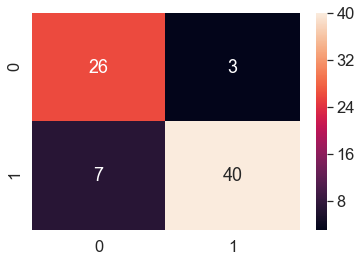

In [40]:
clf = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=100)
clf.fit(xtrain, ytrain)
y_RF_pred = clf.predict(xtest)

print("Accuracy ", clf.score(xtest, ytest)*100)
print(clf.feature_importances_)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_RF_pred, ytest)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

{YES = 1, NO = 0} Horizontal = Predicted, Vertical = Actual (0-0)TN = 26, (1-0)FN = 7, (0-1)FP = 3, (1-1)TP = 40

Accuracy = (TP + TN)/Population*(100)

**Decision Tree**

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

('Accuracy ', 78.94736842105263)


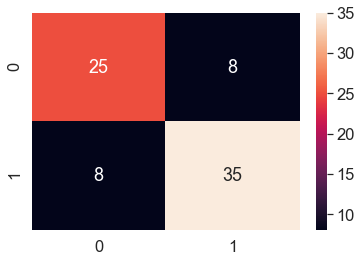

In [30]:
#Model
DeTree = DecisionTreeClassifier()

#Fiting the model
DeTree.fit(xtrain, ytrain)

#Prediction
ypred = DeTree.predict(xtest)

#Accuracy
print("Accuracy ", DeTree.score(xtest, ytest)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(ypred, ytest)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

{YES = 1, NO = 0} Horizontal = Predicted, Vertical = Actual <-> (0-0)TN = 25, (1-0)FN = 8, (0-1)FP = 8, (1-1)TP = 35

**Logistic Regression**

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X

('Accuracy ', 82.89473684210526)


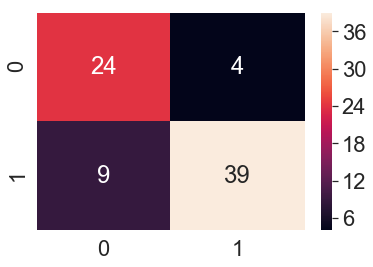

In [31]:
#Model
LoReg = LogisticRegression()

#Fiting the model
LoReg.fit(xtrain, ytrain)

#Prediction
ypred = LoReg.predict(xtest)

#Accuracy
print("Accuracy ", LoReg.score(xtest, ytest)*100)

#Plot the confusion matrix
sns.set(font_scale=2)
cm = confusion_matrix(ypred, ytest)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

{YES = 1, NO = 0} Horizontal = Predicted, Vertical = Actual (0-0)TN = 24, (1-0)FN = 9, (0-1)FP = 4, (1-1)TP = 39